In [1]:
# set project root to correct path
import sys
import os

proj_path = '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode'
if proj_path not in sys.path:
  sys.path.append(proj_path)

from set_path import set_path
set_path()

print(sys.path)
print(os.getcwd())

setting cwd to '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation'
['/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode/jupyter', '/home/payam/miniconda3/envs/tf2-gpu/lib/python39.zip', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/lib-dynload', '', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/site-packages', '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode']
/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from loader.mimic_cxr_jpg_loader import MIMIC_CXR_JPG_Loader
from utils.augmentation import preprocess_image

BATCH_SIZE = 5

def _preprocess(x, y, info=None):
    out = {}
    out['image'] = preprocess_image(
        x, 448, 448, is_training=False, color_distort=False, crop='Center')
    out['label'] = y
    out['info'] = info
    return out


2024-03-06 23:01:25.311476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 23:01:25.948410: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu/lib/
2024-03-06 23:01:25.948513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu

In [3]:
myCustomDataLoader = MIMIC_CXR_JPG_Loader({'train': 1000, 'validate': 100, 'test': 100}, proj_path + '/..')
train_tfds, val_tfds, test_tfds = myCustomDataLoader.load()
class_names = myCustomDataLoader.info()['class_names']
print(myCustomDataLoader.metadata)

merged_data                                        dicom_id subject_id  study_id  \
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014   10000032  50414267   
1  174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962   10000032  50414267   
2  2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab   10000032  53189527   
3  e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c   10000032  53189527   
4  68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714   10000032  53911762   

  PerformedProcedureStepDescription ViewPosition  Rows Columns StudyDate  \
0                CHEST (PA AND LAT)           PA  3056    2544  21800506   
1                CHEST (PA AND LAT)      LATERAL  3056    2544  21800506   
2                CHEST (PA AND LAT)           PA  3056    2544  21800626   
3                CHEST (PA AND LAT)      LATERAL  3056    2544  21800626   
4               CHEST (PORTABLE AP)           AP  2705    2539  21800723   

            StudyTime ProcedureCodeSequence_CodeMeaning  \
0  213014.53100000002                CH

2024-03-06 23:01:30.563098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-06 23:01:30.597123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-06 23:01:30.597339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-06 23:01:30.597843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
{'num_classes': 7, 'class_names': array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Pleural Effusion', 'Pneumonia', 'Pneumothorax'], dtype='<U16'), 'total_size': 377110, 'split_size': {'train': 1000, 'validate': 100, 'test': 100}, 'split_size_frac': {'train': 0.002651746174856143, 'validate': 0.00026517461748561426, 'test': 0.00026517461748561426}}


In [4]:
# TEST 1: ------- Test Train dataset -------
batched_tfds = train_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

In [ ]:
# TEST 2: ------- Test Validation dataset -------
batched_tfds = val_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

In [7]:
# TEST 3: ------- Test dataset filtering -------
filtered_train_tfds, filtered_val_tfds, filtered_test_tfds = myCustomDataLoader.load(['frontal_view', 'has_label'])
batched_tfds = filtered_train_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

merged_data                                         dicom_id subject_id  study_id  \
7   096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4   10000764  57375967   
15  d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738   10000935  50578979   
27  943486a3-b3fa9ff7-50f5a769-7a62fcbb-f39b6da4   10000980  51967283   
30  6ad819bb-bae74eb9-7b663e90-b8deabd7-57f8054a   10000980  54935705   
34  5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88   10000980  57861150   

   PerformedProcedureStepDescription ViewPosition  Rows Columns StudyDate  \
7                 CHEST (PA AND LAT)           AP  2544    3056  21321015   
15               CHEST (PORTABLE AP)           AP  2870    2402  21871016   
27               CHEST (PORTABLE AP)           AP  3056    2544  21890627   
30                CHEST (PA AND LAT)           PA  3056    2544  21910716   
34                CHEST (PA AND LAT)           PA  3056    2544  21910530   

             StudyTime ProcedureCodeSequence_CodeMeaning  \
7            84047.984    

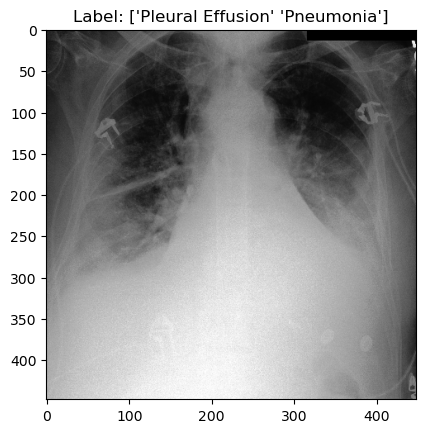

patient ^: {'subject_id': b'18296066', 'study_id': b'52360265', 'dicom_id': b'973e4844-cb72e905-6a76bf88-f936fc5c-68c37d65'}




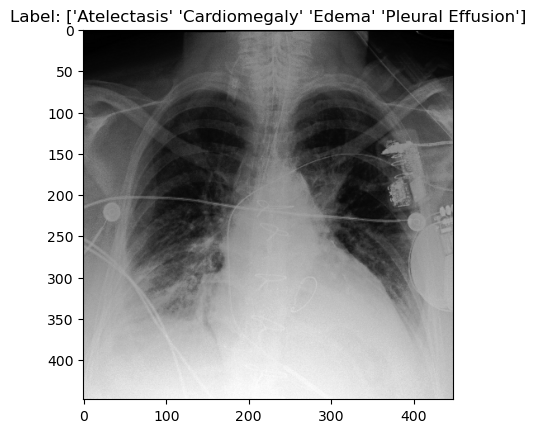

patient ^: {'subject_id': b'10901772', 'study_id': b'50186801', 'dicom_id': b'9c4e15b5-1cdb0fe9-6ca6664b-39ecb5fb-6ddd5bef'}




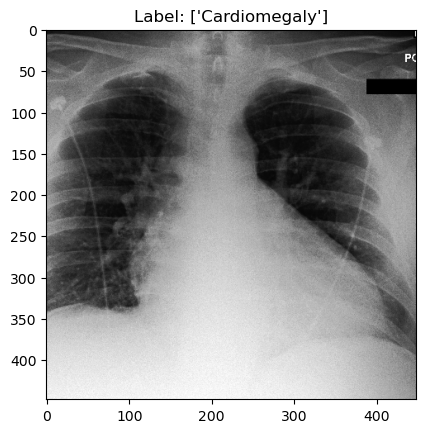

patient ^: {'subject_id': b'19926820', 'study_id': b'57906694', 'dicom_id': b'79c4a3fe-e9d2457b-38478cb1-88cf4904-462f1bda'}




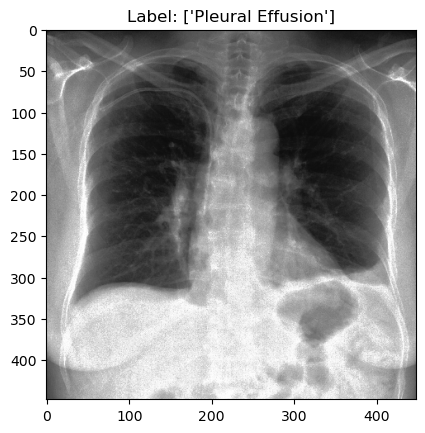

patient ^: {'subject_id': b'15584013', 'study_id': b'58506898', 'dicom_id': b'e1f1a565-1e84a64a-9176154a-2e5c8325-8febea6c'}




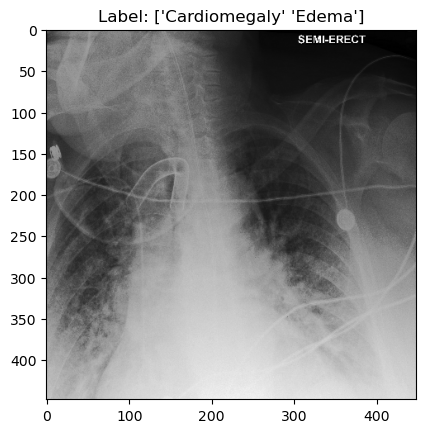

patient ^: {'subject_id': b'16172520', 'study_id': b'51541709', 'dicom_id': b'678f84d6-941be0c8-d3ae7bf2-07407106-90ce6235'}




In [8]:
# Visualize the images and labels for 1 batch

for batch in batched_tfds.take(1):
    for i in range(len(batch['image'])):
        image = batch['image'][i]
        label_idx = np.where(batch['label'][i] == 1)
        labels = class_names[label_idx]
        info = batch['info'][i].numpy()
        info_dict = {'subject_id': info[0], 'study_id': info[1], 'dicom_id': info[2]}

        # Display the image, label, and info
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(f"Label: {labels}")
        plt.show()
        print('patient ^:', info_dict)
        print('\n')
